<h1 style="text-align:center; color:brown">Predicting Exoplanet Count Using Stellar Features: A Data-Driven Approach with Linear Regression</h1>

<h2 style="text-align:left; color:navy">🪐 - Introduction</h2>

In recent years, rapid advancements in exoplanet research have paved the way for exploring the mysteries of planetary systems and the potential for life beyond our solar system. Studying exoplanets offers valuable insights into how planets form and evolve, and provides clues about the possibility of life elsewhere in the universe.

Driven by curiosity about the relationship between stars and their exoplanet companions, this project investigates the connection between a star's characteristics and its exoplanet population. The dataset, known as "Stellar Hosts" from the NASA Exoplanet Archive, provides detailed information on various stellar parameters, such as mass, temperature, radius, luminosity, metallicity, and more—crucial data for analyzing how stars influence the number of planets they host.

To achieve this objective, I employed linear regression with multiple features using Python to develop a predictive model capable of estimating the number of exoplanets a star might have based on its characteristics. Moreover, I optimized the model to enhance computational efficiency, reducing execution time by 79%.

This project also incorporates visual insights and data visualization to help illustrate key patterns, complemented by handwritten notes within the notebook for better clarity.

Ultimately, this project combines my technical expertise in computer science with my passion for astronomy and the cosmos. 🌙🩵

<h2 style="text-align:left; color:navy">🪐 - Installations and imports</h2>

In [207]:
%%capture
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas
!pip3 install scipy
from scipy.stats import norm
from IPython.display import Image, display

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math
%matplotlib inline

<h2 style="text-align:left; color:navy">🪐 - Load the dataset and definitions</h2>

<h3>Dataset reference and acknowledgement</h3>
This research has made use of the NASA Exoplanet Archive, which is operated by the California Institute of Technology, under contract with the National Aeronautics and Space Administration under the Exoplanet Exploration Program.<br/>
Digital Object Identifier (DOI) : 10.26133/NEA40<br/>
Name of the dataset: Stellar Hosts<br/>



In [209]:
# Load data
data = pd.read_csv('stellarhosts.csv')

In [242]:
# Visualize data
data.head()

,sy_pnum,st_teff,st_rad,st_mass,st_met,st_lum,st_logg
1,1,4874.0,13.76,2.09,-0.26,1.978,2.45
6,1,4742.0,19.00,2.70,-0.35,2.243,2.31
19,1,4888.0,11.55,1.78,-0.21,1.840,2.55
20,1,4813.0,11.00,2.20,-0.24,1.763,2.63
29,2,5280.0,1.00,0.91,0.40,-0.153,4.40


<h3> Column definition</h3>
sy_pnum: Number of confirmed exoplanets <br/>
st_teff: Temperature of the star as modeled by a black body emitting the same total amount of electromagnetic radiation (in K)<br/>
st_rad: Length of a line segment from the center of the star to its surface, measured in units of radius of the Sun (in Solar Radius)<br/>
st_mass: Amount of matter contained in the star, measured in units of masses of the Sun (in Solar mass)<br/>
st_met: Measurement of the metal content of the photosphere of the star as compared to the hydrogen content (in dex)<br/>
st_lum: Amount of energy emitted by a star per unit time, measured in units of solar luminosities (in log10(Solar))<br/>
st_logg: Gravitational acceleration experienced at the stellar surface (in log10(cm/s**2))<br/>

<h3 style="color:red" > Objective </h3>
Our objective is to predict the variable "sy_pnum," which represents the number of exoplanets, based on the features of a given star (st_teff, st_rad, st_mass, st_met, st_lum, st_logg).

<h2 style="text-align:left; color:navy">🪐 - Data processing</h2>

There is a lot of rows with missing data "NaN", we are going to clean the dataset and remove rows with missing values so it does not affect our model later on.

In [211]:
# Drop the rows with null values
data_cleaned = data.dropna()
data_cleaned.head()

,sy_pnum,st_teff,st_rad,st_mass,st_met,st_lum,st_logg
1,1,4874.0,13.76,2.09,-0.26,1.978,2.45
6,1,4742.0,19.00,2.70,-0.35,2.243,2.31
19,1,4888.0,11.55,1.78,-0.21,1.840,2.55
20,1,4813.0,11.00,2.20,-0.24,1.763,2.63
29,2,5280.0,1.00,0.91,0.40,-0.153,4.40


In [243]:
# Update the data variable
data = data_cleaned
# Create a new CSV file with the cleaned dataset
data.to_csv('stellarhosts-cleaned.csv', index=False)

In [244]:
data.head()

,sy_pnum,st_teff,st_rad,st_mass,st_met,st_lum,st_logg
1,1,4874.0,13.76,2.09,-0.26,1.978,2.45
6,1,4742.0,19.00,2.70,-0.35,2.243,2.31
19,1,4888.0,11.55,1.78,-0.21,1.840,2.55
20,1,4813.0,11.00,2.20,-0.24,1.763,2.63
29,2,5280.0,1.00,0.91,0.40,-0.153,4.40


Now that the dataset has been cleaned let's visualize it.

<h2 style="text-align:left; color:navy">🪐 - Visualize the data</h2>

In [214]:
# Take the dataset and drop the "sy_pnum" variable so we can load the "inputs" data inside the variable "X_train"
X_train = data.drop(columns=['sy_pnum']).values.tolist()
X_features = ['st_teff', 'st_rad', 'st_mass', 'st_met', 'st_lum', 'st_logg']
# Convert into a numpy array so we can work with the data
X_train = np.array(X_train)
print(X_train)

[[ 4.874e+03  1.376e+01  2.090e+00 -2.600e-01  1.978e+00  2.450e+00]
 [ 4.742e+03  1.900e+01  2.700e+00 -3.500e-01  2.243e+00  2.310e+00]
 [ 4.888e+03  1.155e+01  1.780e+00 -2.100e-01  1.840e+00  2.550e+00]
 ...
 [ 4.836e+03  1.122e+01  1.480e+00 -2.000e-01  1.800e+00  2.460e+00]
 [ 4.841e+03  1.086e+01  1.740e+00 -1.100e-01  1.767e+00  2.610e+00]
 [ 4.780e+03  1.200e+01  2.200e+00 -2.050e-01  1.839e+00  2.660e+00]]


In [215]:
# Load the "targets" data inside the "y_train" variable
y_train = data['sy_pnum']
# Convert into a numpy array so we can work with the data
y_train = np.array(y_train)

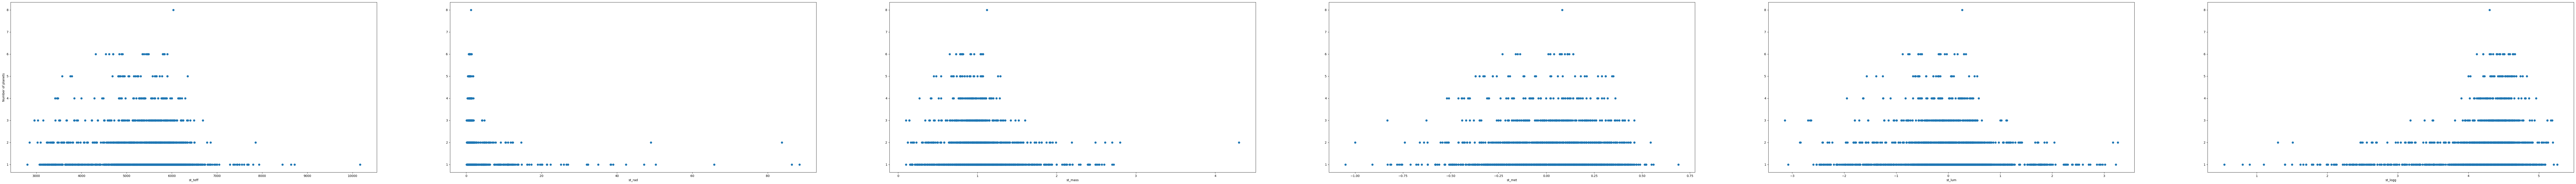

In [216]:
# Visualize the dataset by plotting each features versus the number of planets "sy_pnum" (targets)
fig, ax = plt.subplots(1, 6, figsize=(150, 10), sharey=False)
for i in range(len(ax)):
    ax[i].scatter([x[i] for x in X_train], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Number of planets")
plt.show()

These 6 graphs represents the star's features on x-axis versus the number of planets on the y-axis.

<h2 style="text-align:left; color:navy">🪐 - The model</h2>

In supervised machine learning, the algorithm learns to create a reasonably accurate prediction of the 'target' by observing correct pairs of 'input' and the desired 'target' (output).

In our case it is by seeing correct pairs of star's features (st_teff, st_rad, st_mass, st_met, st_lum, st_logg) and the number of confirmed exoplanets associated with it that the algorithm will learn to predict an accurate number of exoplanets when we give it some star's features.

The model we will use to predict the star's number of planets will be a function with multiple features. 
The inputs of this function are going to be the star's features and the output of the function will be the number of exoplanets.

Let's see how our function is going to be. (See image I did down below)

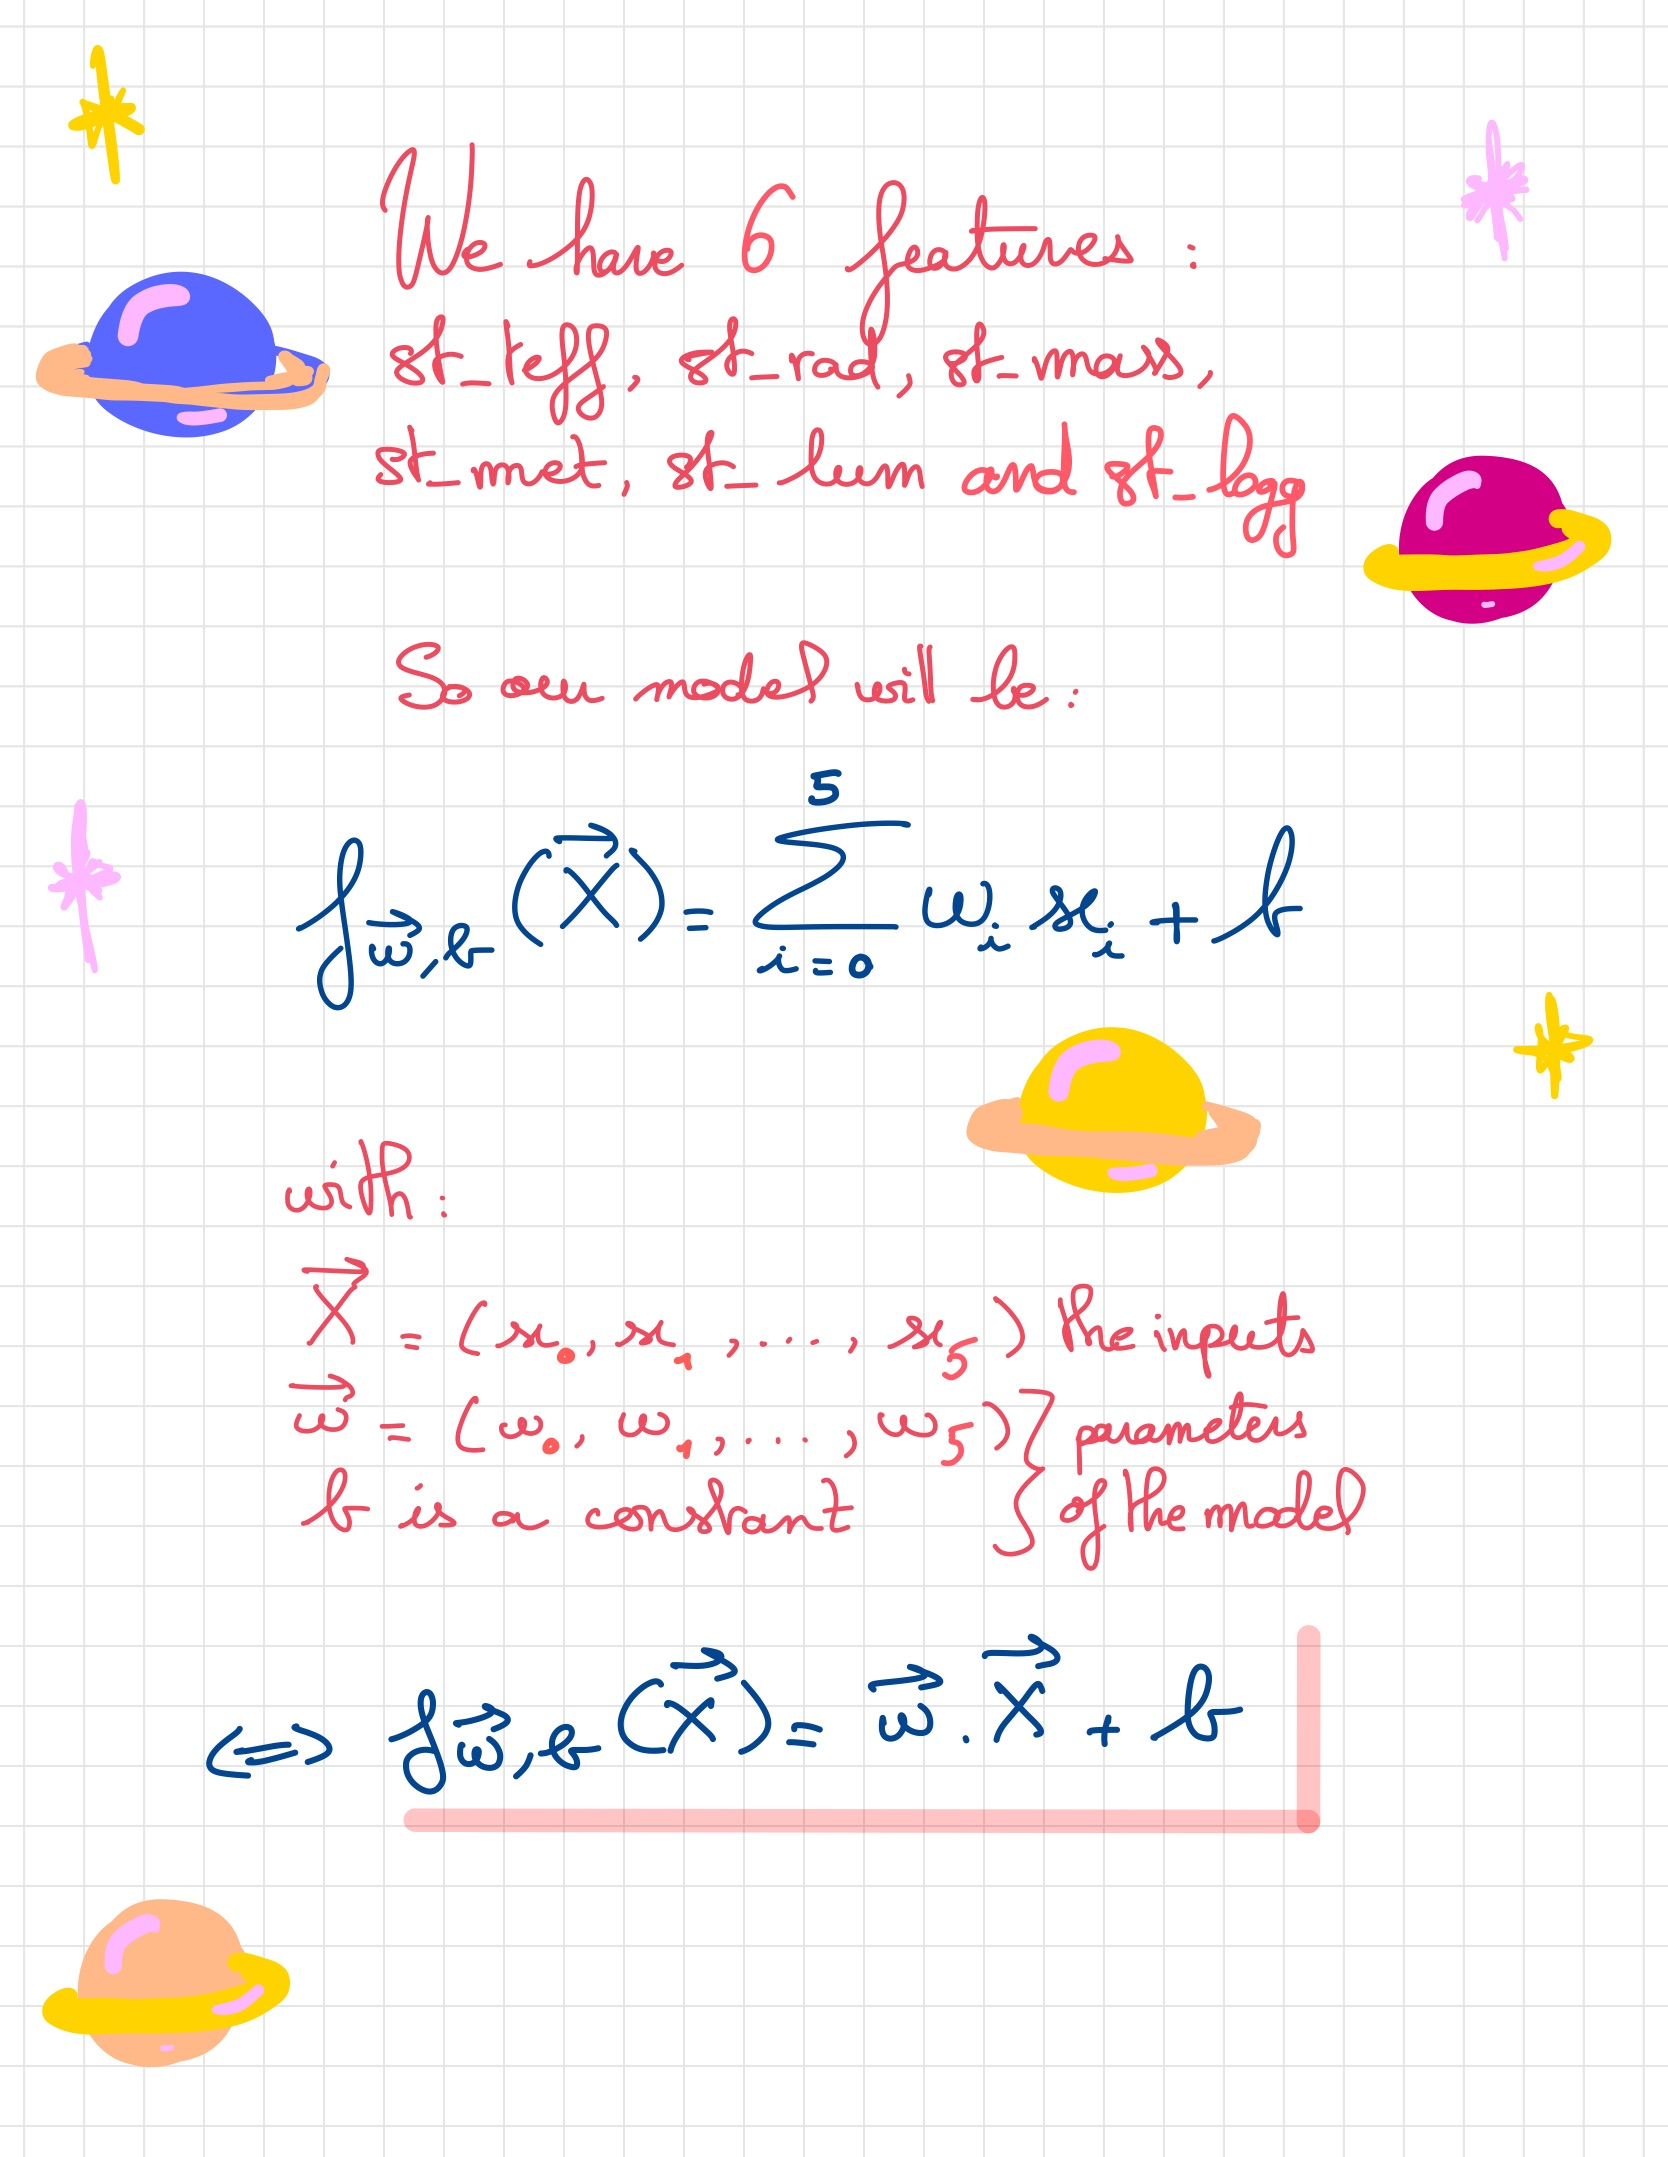

In [217]:
# Display the image "Note-1.png"
display(Image(filename='image/Note-1.png'))

<h2 style="text-align:left; color:navy">🪐 - The Cost function</h2>

To have our function that will predict the star's number of planets , we  need to find the function's parameters: the vector w and the constant b. However, we need to find w and b so the predicted 'target' is close to the actual 'target' for all pairs ('input', 'target').

To measure that we use the Cost function.

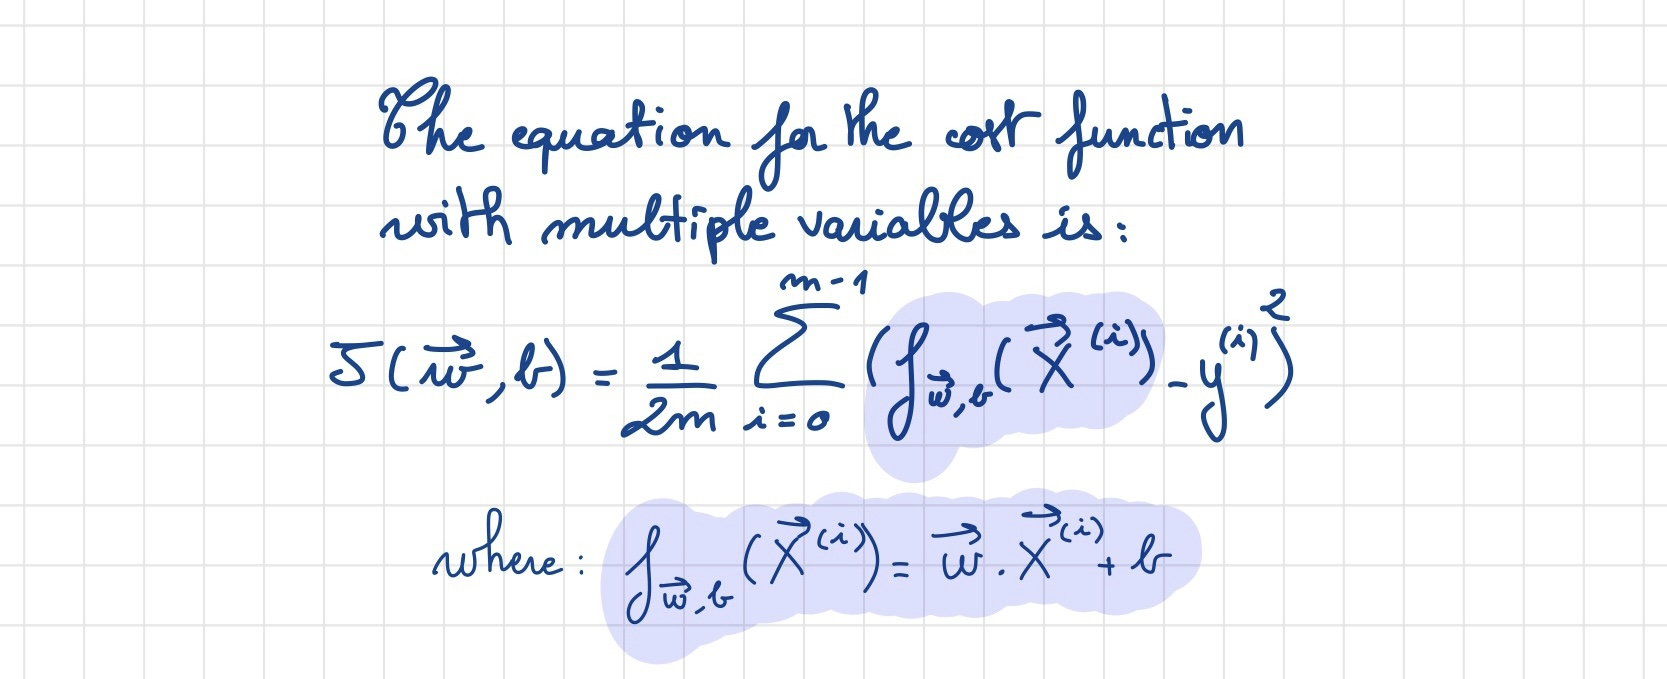

In [218]:
# Display the image "Note-2.png"
display(Image(filename='image/Note-2.png'))

The cost function measures the difference between the predicted 'target' and the actual 'target.' So, the closer the cost function is to 0, the better our model is.

<h3>Cost function in Python:</h3>

In [219]:
def cost_function(X, y, w, b):
    """
    arguments:
      X : Matrix of the 'inputs' data of size n,m
      y : List of the 'targets' data of lenght m
      w : Vector w of size p (parameters for prediction)
      b : Scalar b for prediction

    return: cost : Return the cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

<h2 style="text-align:left; color:navy">🪐 - Gradient descent</h2>

To find the parameters w and b that will give us the smallest possible cost Jwe will use the gradient descent alogorithm.
Let's first see how gradient descent works.

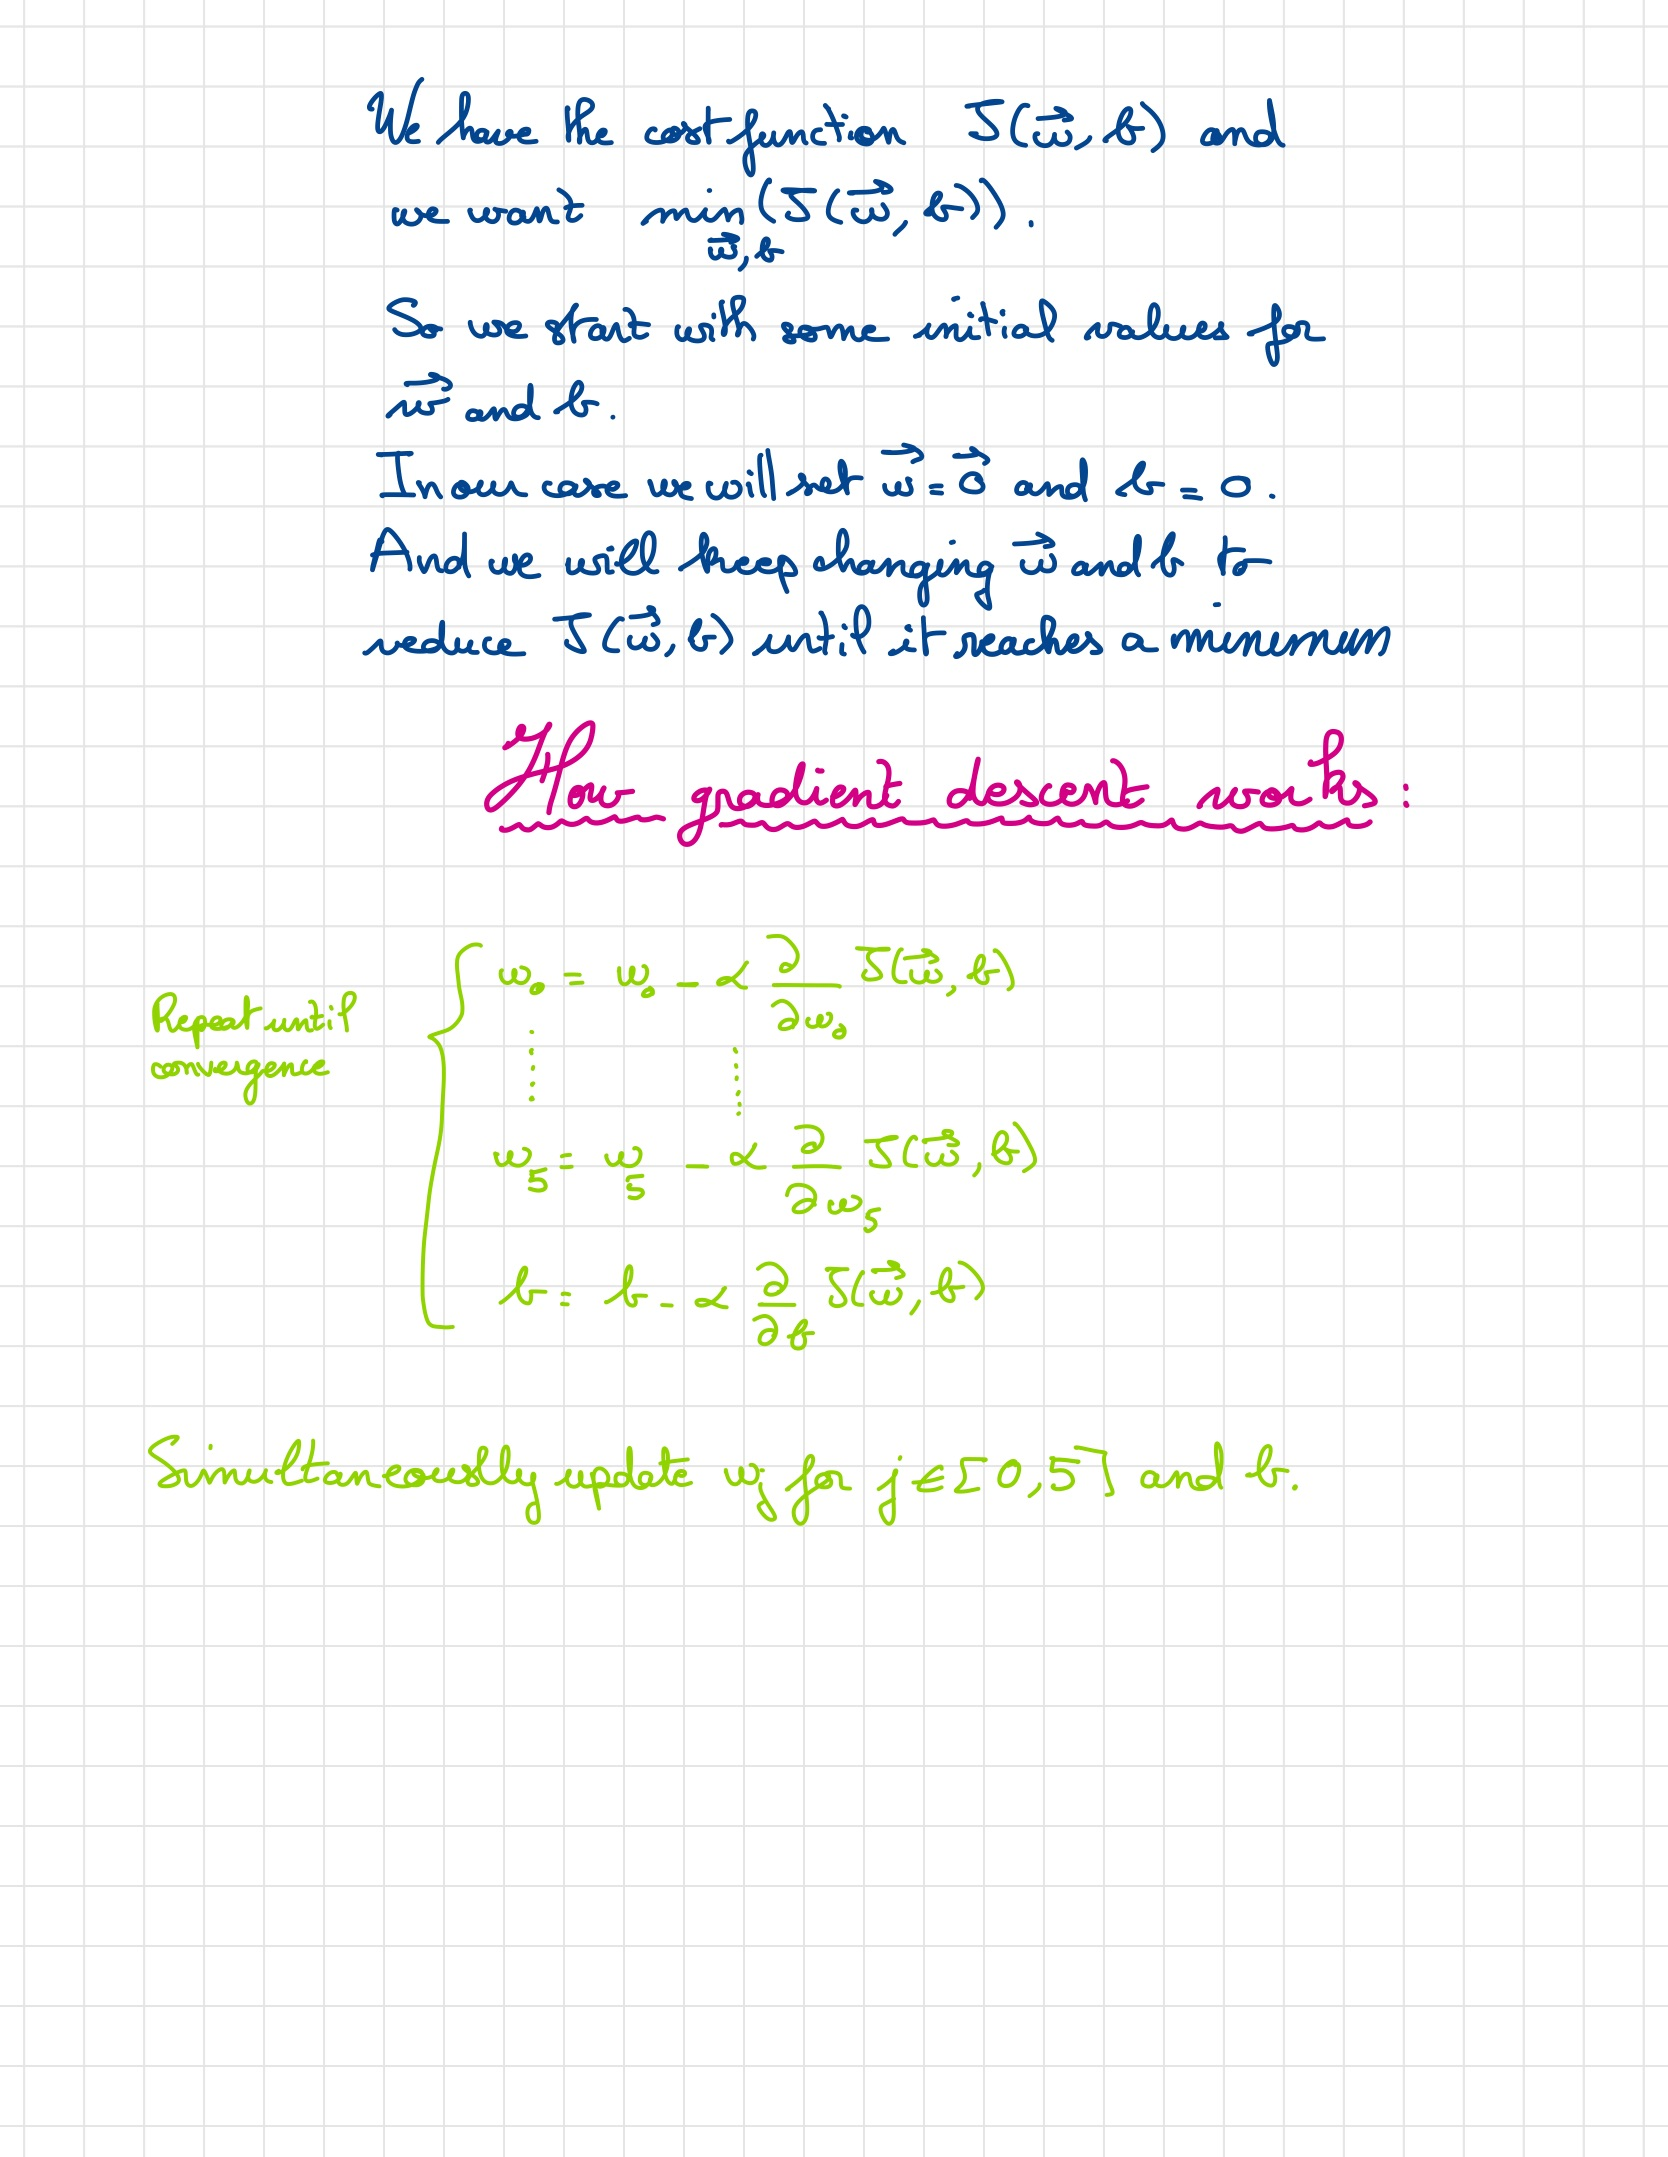

In [220]:
# Display the image "Note-3.png"
display(Image(filename='image/Note-3.png'))

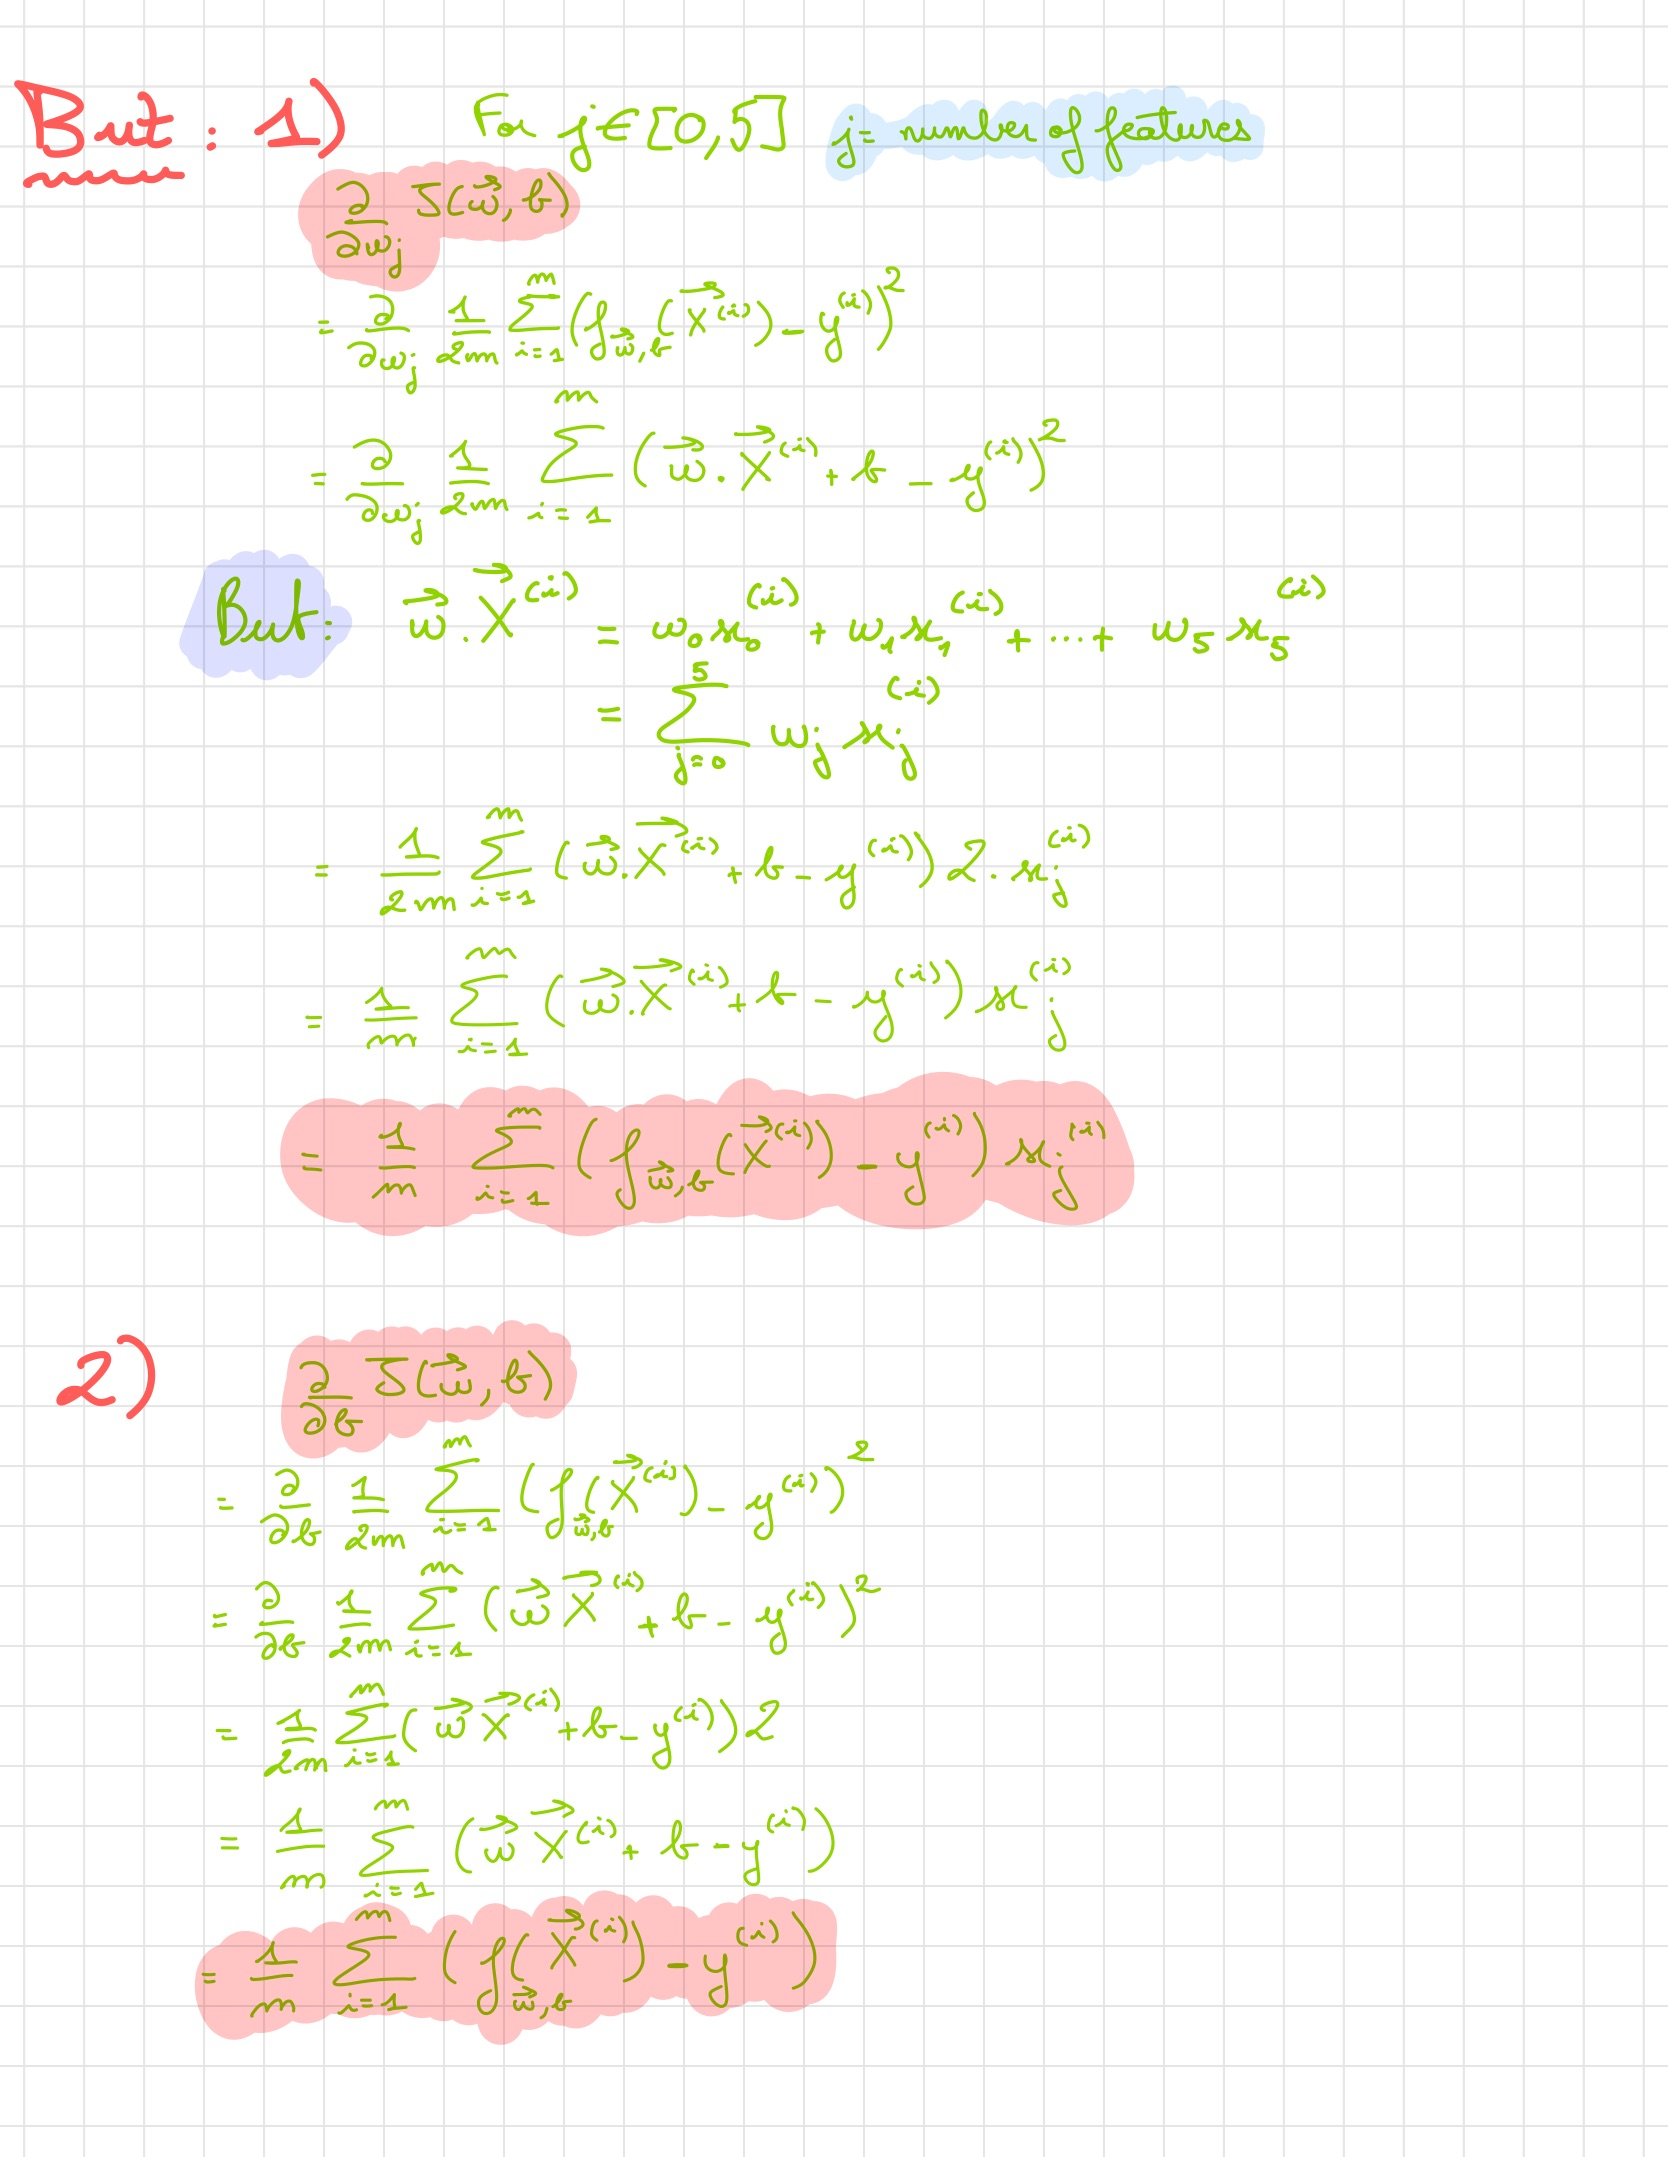

In [221]:
# Display the image "Note-4.png"
display(Image(filename='image/Note-4.png'))

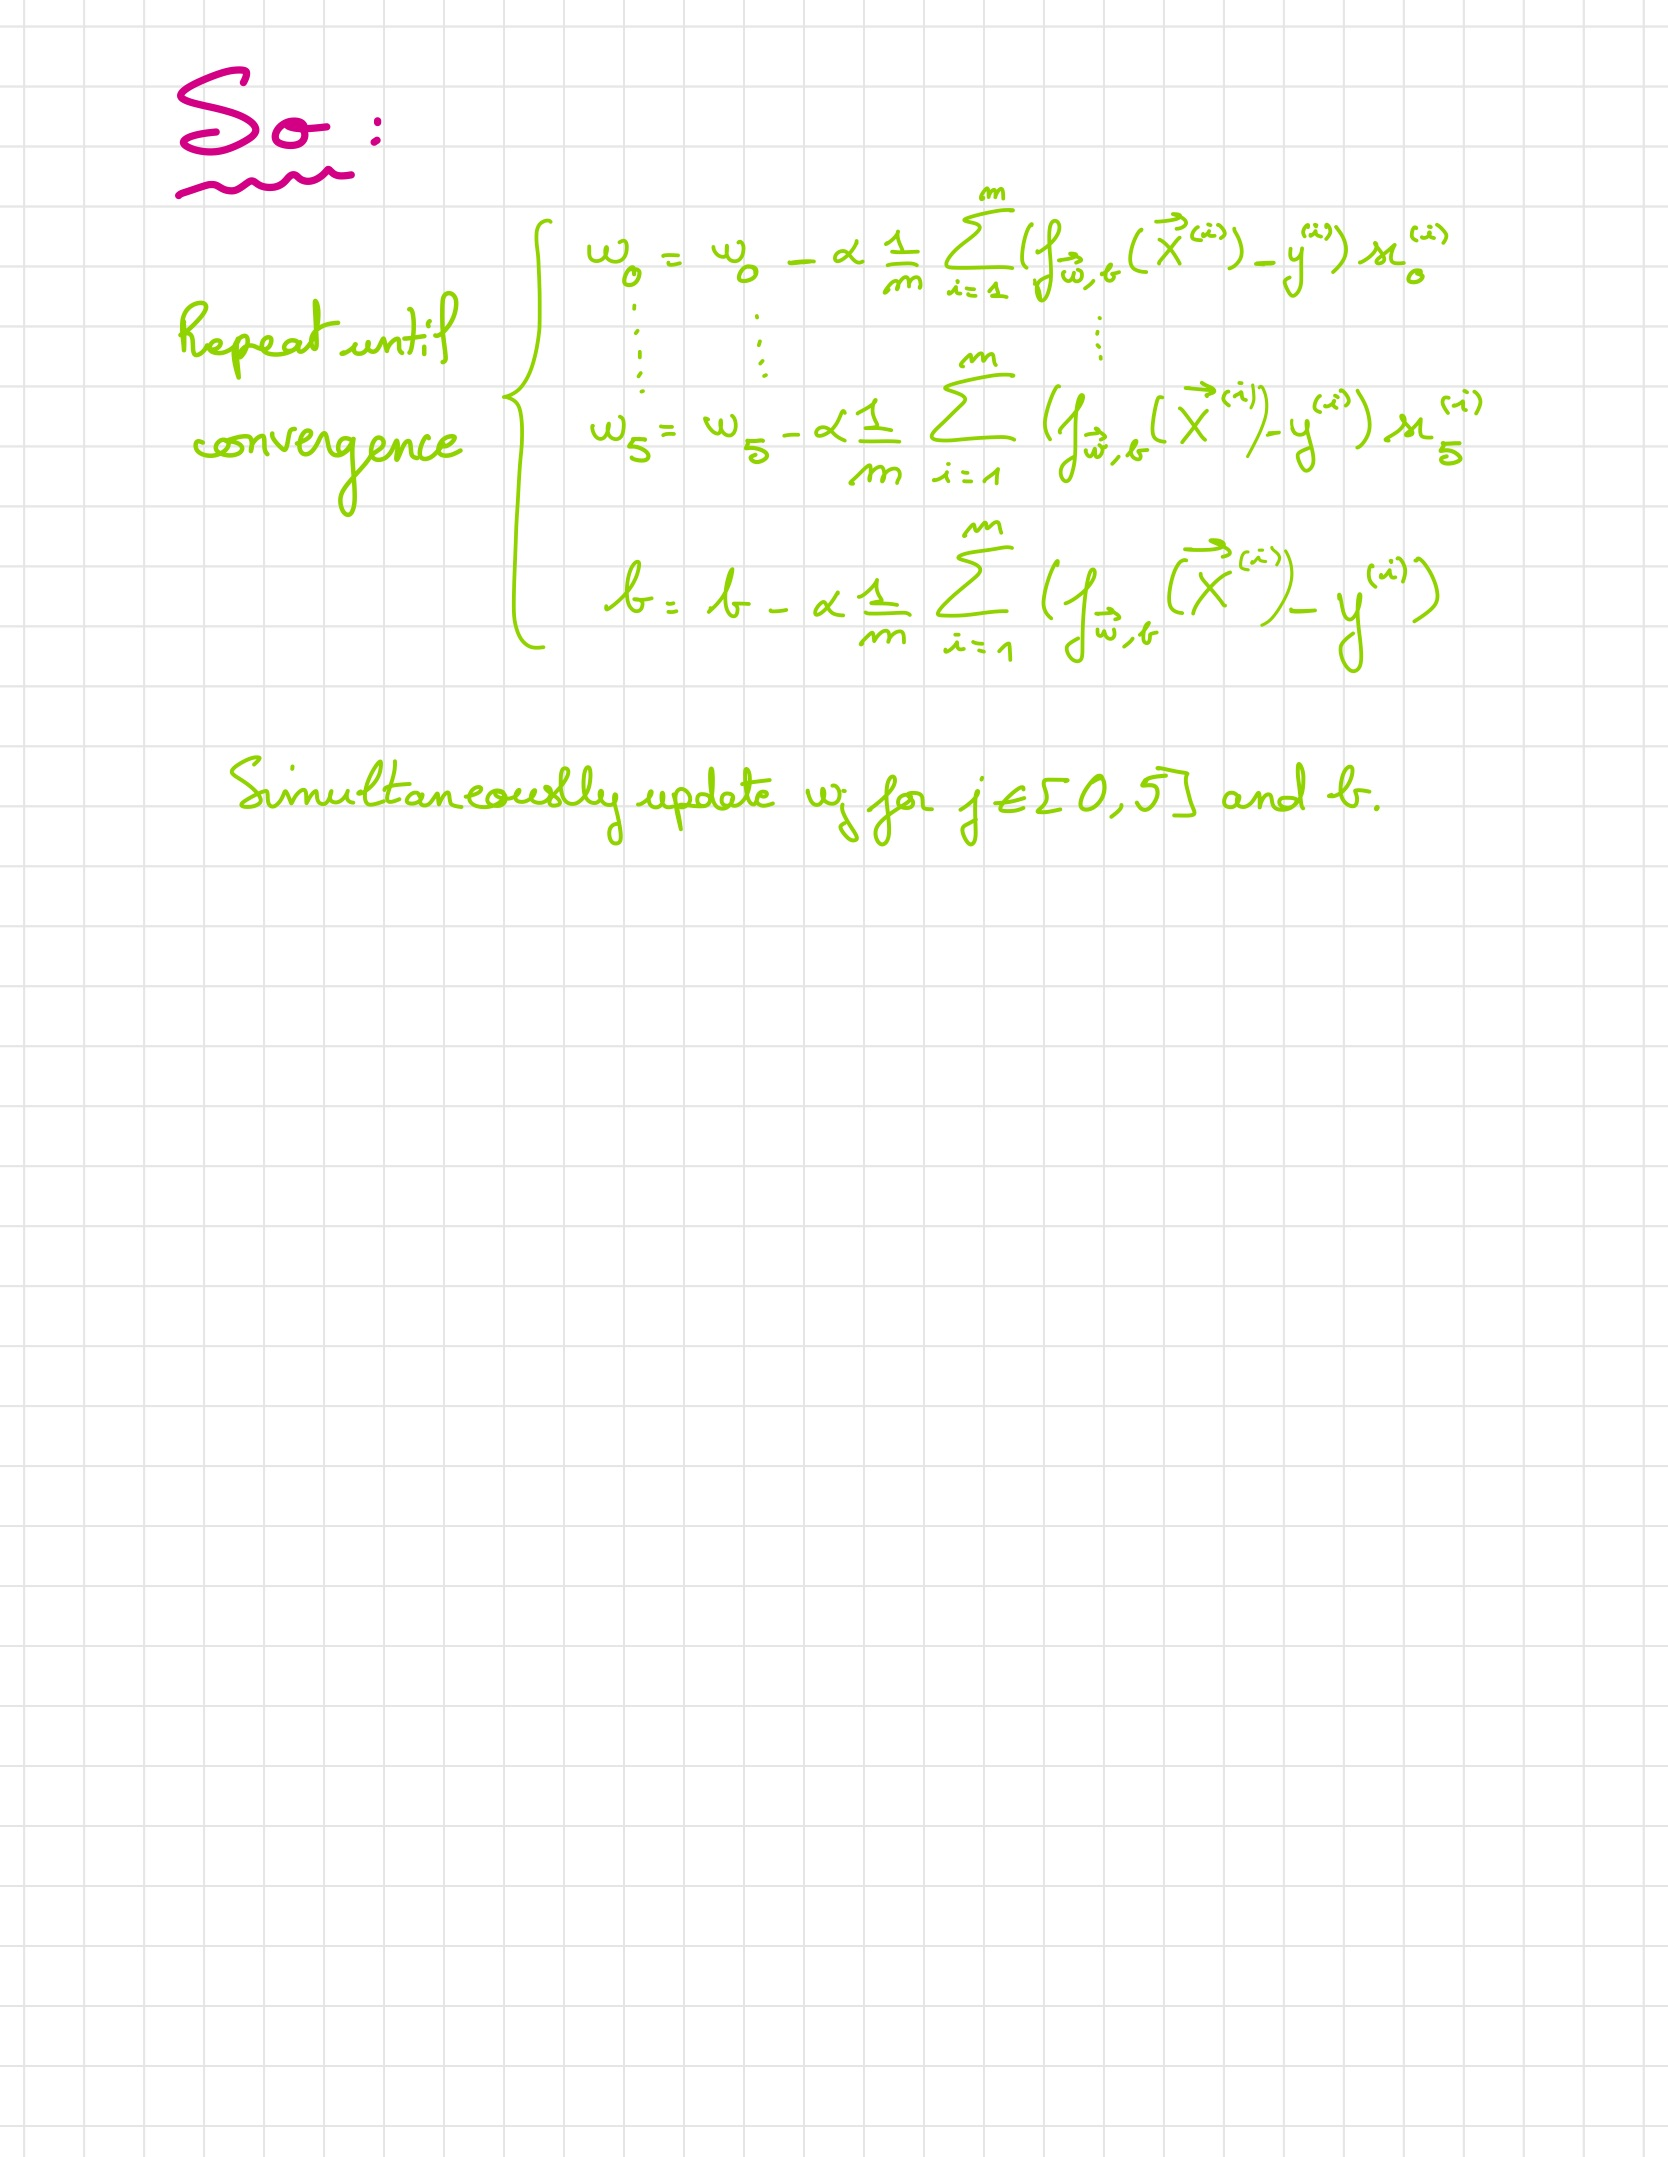

In [222]:
# Display the image "Note-5.png"
display(Image(filename='image/Note-5.png'))

<h3>Python implementation of gradient descent:</h3>

In [223]:
def gradient_descent(X, y, cost_function, alpha, iterations):
    """
    
    arguments:
      X : Matrix of the 'inputs' data of size n,m
      y : List of the 'targets' data of lenght m
      alpha : Learning rate
      iterations : number of iterations to run gradient descent

    return: 
        w : Updated values of w of the model after running gradient descent
        b : Updated value of b of the model after running gradient descent
        store: Updated dictionnary used for visualisation
        
    """
    
    m,n = X.shape
    
    w = np.zeros(n)
    b = 0

    # A dictionnary to store values at each iteration for visualization
    store={}
    #Store the cost values at each iteration..
    store["cost"] = [];
    #Store parameter values at each iteration.
    store["parameters"] = [];
    #Store gradient values at each iteration.
    store["gradients"]=[];
    #Store the iteration number at each iteration.
    store["iterations"]=[];

    #Control how often data is saved or recorded during the gradient descent process
    save_interval = np.ceil(iterations/10000)

    print(f"Iteration   Cost         w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")

    for iteration in range(iterations):
        
        # Calculate the gradient and update the parameters

        dj_dw = np.zeros((n,))
        dj_db = 0.

        for i in range(m):                             
            err = (np.dot(X[i], w) + b) - y[i]   
            for j in range(n):                         
                dj_dw[j] = dj_dw[j] + err * X[i,j]    
            dj_db = dj_db + err                        
        dj_dw = dj_dw/m                                
        dj_db = dj_db/m

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db

        #Control when to save data during the gradient descent process so we collect data at 
        #regular intervals without saving it for every single iteration which is computationally expensive.
        if iteration == 0 or iteration % save_interval == 0:     
            store["cost"].append(cost_function(X, y, w, b))
            store["parameters"].append([w,b])
            store["gradients"].append([dj_dw,dj_db])
            store["iterations"].append(iteration)

        # Print cost every at intervals 20 times or as many iterations if < 20
        if iteration% math.ceil(iterations/20) == 0:
            cst = cost_function(X, y, w, b)
            print(f"{iteration:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")


    print(f"w,b found by gradient descent: w: {w}, b: {b:0.2f}")
       
    return w, b, store

Note: I am going to print only the result for the first four star's features for readability purposes. 

In [224]:
w, b, store = gradient_descent(X_train, y_train, cost_function, alpha=8e-9, iterations=1000)

Iteration   Cost         w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.96872e-01  6.2e-05  1.9e-08  1.1e-08  3.9e-10  1.2e-08 -7.7e+03 -2.4e+00 -1.4e+00 -4.9e-02 -1.4e+00
       50 4.16347e-01  2.6e-04  5.6e-08  3.7e-08 -2.5e-09  6.2e-08 -8.8e-03  6.6e-02  3.1e-02  1.1e-02 -3.7e-02
      100 4.16347e-01  2.6e-04  3.0e-08  2.4e-08 -6.8e-09  7.7e-08  1.5e-04  6.6e-02  3.1e-02  1.1e-02 -3.7e-02
      150 4.16347e-01  2.6e-04  3.1e-09  1.2e-08 -1.1e-08  9.1e-08  1.5e-04  6.6e-02  3.1e-02  1.1e-02 -3.7e-02
      200 4.16347e-01  2.6e-04 -2.3e-08 -1.0e-11 -1.6e-08  1.1e-07  1.5e-04  6.6e-02  3.1e-02  1.1e-02 -3.7e-02
      250 4.16347e-01  2.6e-04 -5.0e-08 -1.2e-08 -2.0e-08  1.2e-07  1.5e-04  6.6e-02  3.1e-02  1.1e-02 -3.7e-02
      300 4.16347e-01  2.6e-04 -7.6e-08 -2.4e-08 -2.4e-08  1.4e-07  1.5e-04  6.6e-02  3.1e-02  1.1e-02 

We can see that the learning rate is converging (the gradient descent took 12 seconds). Let's know visualize it by plotting it in a graph. 

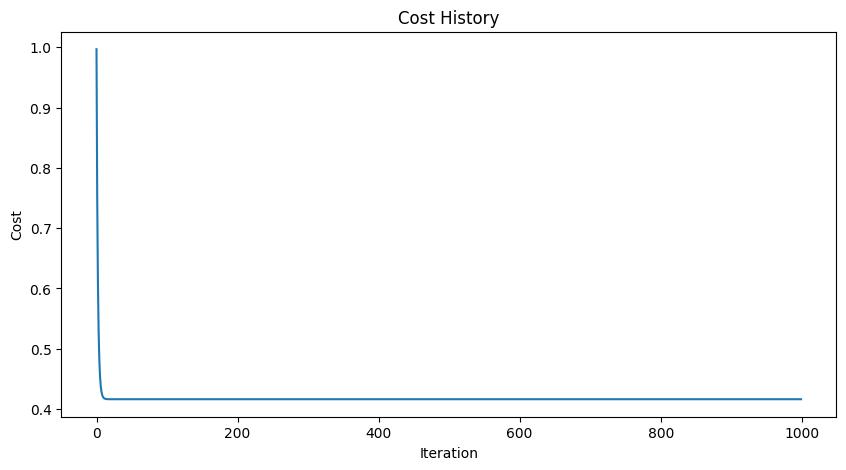

In [225]:
# Extract cost history from the store dictionary
cost_history = store["cost"]

# Set graph size
plt.figure(figsize=(10, 5))

# Create a plot of the cost history
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")

plt.show()

On the graph we can see that the cost is converging towards a value which is good. Let's plot w0 in function of the cost.

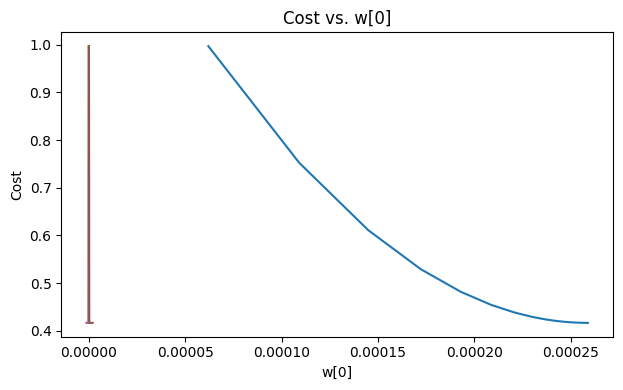

In [226]:
w0_history = [parameters[0] for parameters in store["parameters"]]
# Create a plot of the cost history
plt.figure(figsize=(12, 4))
# Plot cost vs. w[0]
plt.subplot(1, 2, 2)
plt.plot(w0_history, cost_history)
plt.xlabel("w[0]")
plt.ylabel("Cost")
plt.title("Cost vs. w[0]")

plt.tight_layout()
plt.show()

We can see that w0 is decreasing as it should towards a minimum. The learning rate is correct, the cost is indeed converging.

<h3>
    Lets's see what happen with a learning rate that is too large.
</h3>

In [227]:
w_test, b_test, store_test = gradient_descent(X_train, y_train, cost_function, alpha=1e-7, iterations=500)

Iteration   Cost         w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.39305e+00  7.7e-04  2.4e-07  1.4e-07  4.9e-09  1.4e-07 -7.7e+03 -2.4e+00 -1.4e+00 -4.9e-02 -1.4e+00
       25 3.57506e+15 -1.5e+04 -5.0e+00 -2.9e+00 -1.2e-01 -2.8e+00  2.3e+11  7.5e+07  4.4e+07  1.8e+06  4.2e+07
       50 3.21399e+30  4.6e+11  1.5e+08  8.8e+07  3.6e+06  8.4e+07 -7.0e+18 -2.2e+15 -1.3e+15 -5.4e+13 -1.3e+15
       75 2.88938e+45 -1.4e+19 -4.5e+15 -2.6e+15 -1.1e+14 -2.5e+15  2.1e+26  6.7e+22  4.0e+22  1.6e+21  3.8e+22
      100 2.59756e+60  4.2e+26  1.3e+23  7.9e+22  3.2e+21  7.5e+22 -6.3e+33 -2.0e+30 -1.2e+30 -4.8e+28 -1.1e+30
      125 2.33521e+75 -1.2e+34 -4.0e+30 -2.4e+30 -9.6e+28 -2.3e+30  1.9e+41  6.0e+37  3.6e+37  1.4e+36  3.4e+37
      150 2.09935e+90  3.7e+41  1.2e+38  7.1e+37  2.9e+36  6.8e+37 -5.6e+48 -1.8e+45 -1.1e+45 -4.3e+43 

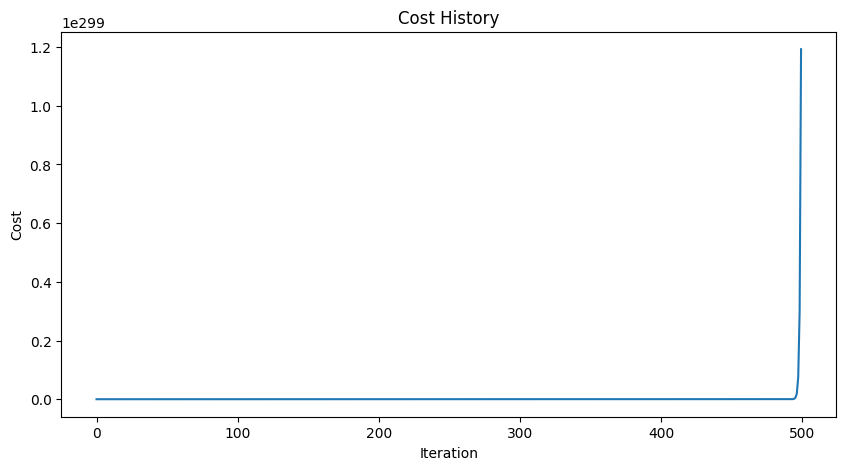

In [228]:
# Extract cost history from the store dictionary
cost_history = store_test["cost"]

# Set graph size
plt.figure(figsize=(10, 5))

# Create a plot of the cost history
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")

plt.show()

With a learning rate too large the cost is diverging.

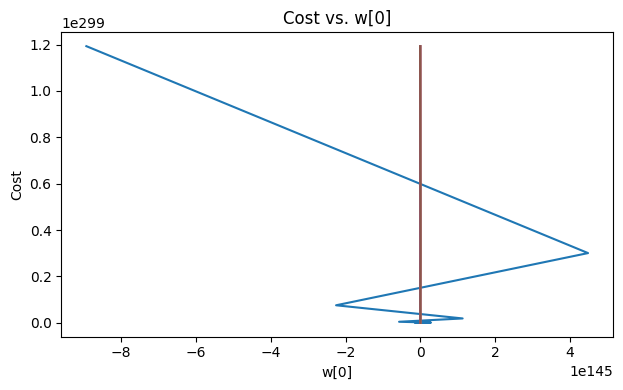

In [229]:
w0_history = [parameters[0] for parameters in store_test["parameters"]]
# Create a plot of the cost history
plt.figure(figsize=(12, 4))
# Plot cost vs. w[0]
plt.subplot(1, 2, 2)
plt.plot(w0_history, cost_history)
plt.xlabel("w[0]")
plt.ylabel("Cost")
plt.title("Cost vs. w[0]")

plt.tight_layout()
plt.show()

Here too we can see that when the learning rate is too large, w0 is diverging.

<h2 style="text-align:left; color:navy">🪐 - Compare the predicted targets and the actual targets</h2>

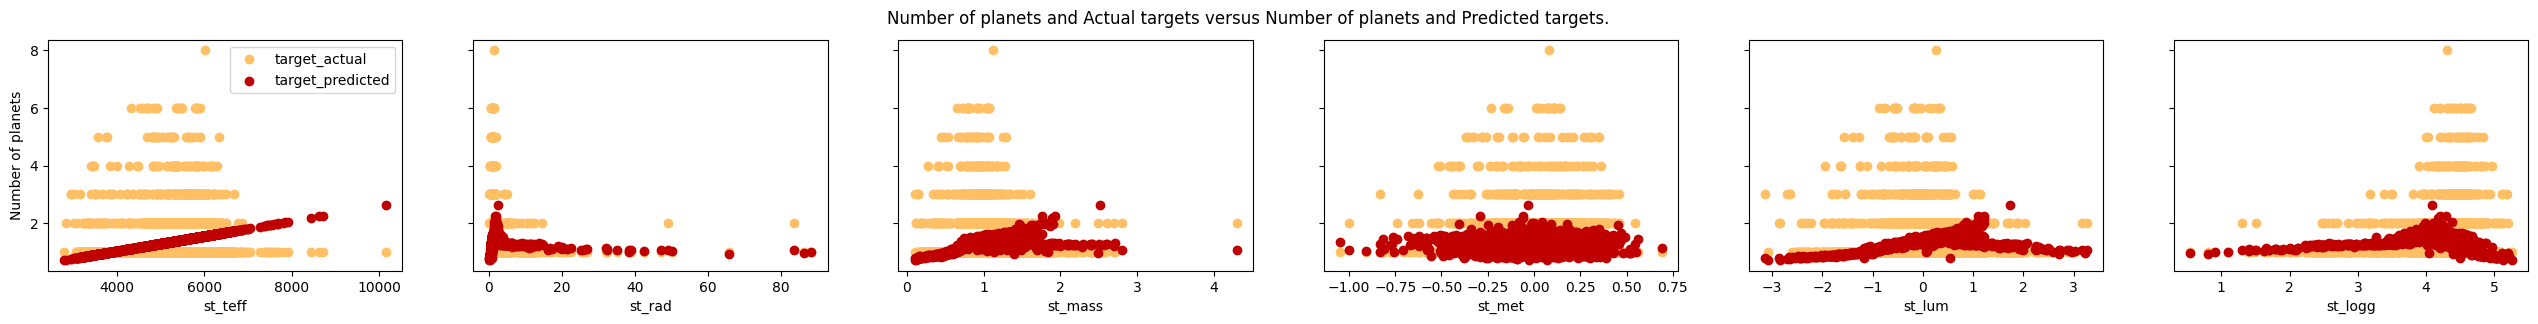

In [230]:
#Colors
yellow = '#FFBF65'
red = '#C00000'

# Predict target using normalized features
m = X_train.shape[0]
y_predicted = np.zeros(m)
for i in range(m):
    y_predicted[i] = np.dot(X_train[i], w) + b

    # Plot predictions and targets versus original features    
fig,ax=plt.subplots(1,6,figsize=(32, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, color=yellow, label = 'target_actual')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_predicted,color=red, label = 'target_predicted')
ax[0].set_ylabel("Number of planets"); ax[0].legend();
fig.suptitle("Number of planets and Actual targets versus Number of planets and Predicted targets.")

plt.show()

The plots above illustrate the relationship between various stellar features and the number of exoplanets. The orange dots represent the actual observed values, while the red dots indicate the predicted values derived from the linear regression model.

While the model captures some general trends, particularly with features like stellar mass, metallicity, and luminosity, it struggles to deliver accurate predictions across the board. This can be attributed to the complexity of the dataset, the factor of noise and the loss of valuable information during data preprocessing, where many columns had to be removed. As a result, the model’s ability to make precise predictions is limited.

However, we observe that the model performs reasonably well when predicting a small number of exoplanets. The model exhibits some correlation with the stellar features, though it becomes less reliable as the number of exoplanets increases. For further improvement, more advanced models and a richer dataset could better capture the complexity and variability of the star-planet relationships.

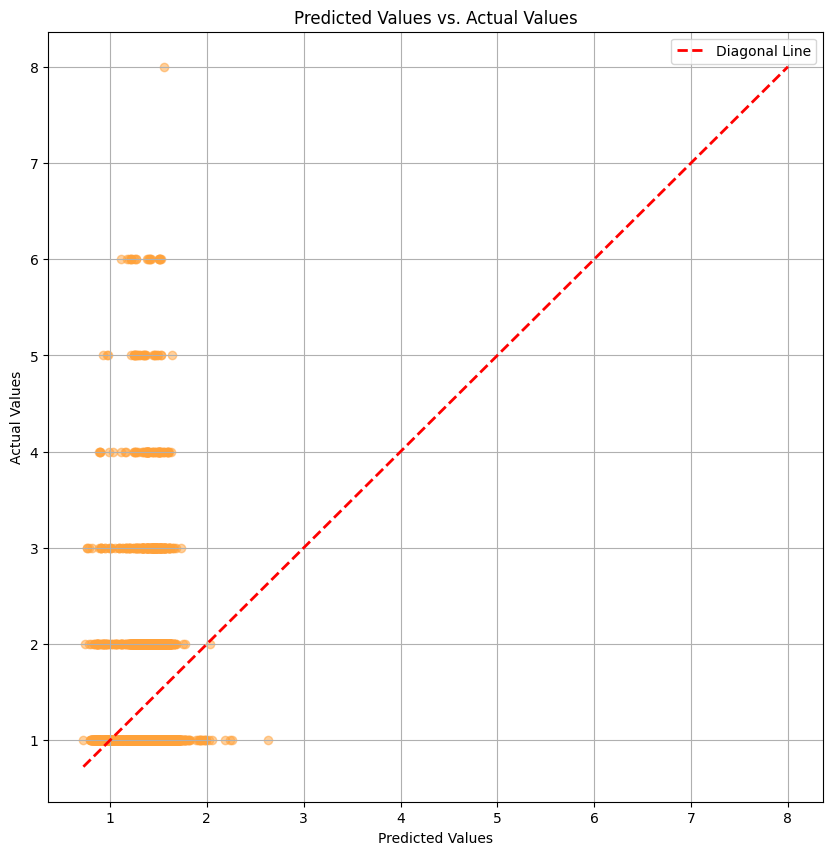

In [231]:
yellow = '#FFA23A'

plt.figure(figsize=(10, 10))
plt.scatter(y_predicted, y_train, alpha=0.5, color = yellow)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted Values vs. Actual Values")
plt.grid(True)

# Add a diagonal line
min_val = min(y_predicted.min(), y_train.min())
max_val = max(y_predicted.max(), y_train.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=2, label='Diagonal Line')

plt.legend()
plt.show()

The plot above compares the predicted values generated by the linear regression model against the actual target values. The orange dots represent the actual values, while the red diagonal line indicates perfect predictions, meaning that any predicted value falling on this line would be an exact match to the actual value.

From the plot, we can observe the following:
- Most predicted values cluster around lower values (1–3), reflecting the model’s bias toward the more common number of planets in the dataset.
- While the predictions for smaller values show some alignment with the actual values, the model's ability to predict more complex patterns (e.g., predicting a high number of planets) is limited, indicating that further improvements or more sophisticated models may be necessary.

<h2 style="text-align:left; color:navy">🪐 - First conclusion</h2>

Let's know predict a star's number of planets for an actual value in our dataset.

In [232]:
x_star = np.array([4874.0, 13.76, 2.09, -0.26, 1.978, 2.45])
x_star_planets = 1
x_star_predict_planets = np.dot(x_star, w) + b
print(f" For a star with {x_star[0]} K in effective temperature, {x_star[1]} solar radius, {x_star[2]} solar mass, {x_star[3]} dex in metalicity, {x_star[4]} log10(Solar) of luminosity, {x_star[5]} log10(cm/s**2) of gravitational acceleration, we have a number of exoplanets of {x_star_predict_planets}.")

 For a star with 4874.0 K in effective temperature, 13.76 solar radius, 2.09 solar mass, -0.26 dex in metalicity, 1.978 log10(Solar) of luminosity, 2.45 log10(cm/s**2) of gravitational acceleration, we have a number of exoplanets of 1.2623327758957106.


Using our model, the predicted number of exoplanets is 1.26. If we round this prediction to the nearest whole number, we get 1 exoplanet, which matches the actual value in the dataset.

This prediction demonstrates that the linear regression model can provide reasonably accurate results when dealing with certain stars, especially when the number of exoplanets is relatively small. However, the slight difference between the predicted value (1.26) and the actual value (1) also reflects the model's limitations in perfectly predicting real-world data. But in our case this difference is negligible.

<h2 style="text-align:left; color:navy">🪐 - Optimization </h2>

To optimize our model, let's normalize the data.
By using normalisation, we will rescale the dataset so all the features will have a similar range and the gradient descent algorythm will run much faster. Initially our gradient descent algorithm took 12 seconds.
I will use z-score normalisation. After the normalisation all the features will have a mean of 0 and a standard deviation of 1.

<h3>Python implementation of z-score normalisation function:</h3>

In [233]:
def zscore_normalize_features(X):
    mu     = np.mean(X,axis=0)  
    sigma  = np.std(X,axis=0)
    X_norm = (X - mu)/sigma
    return (X_norm, mu, sigma)

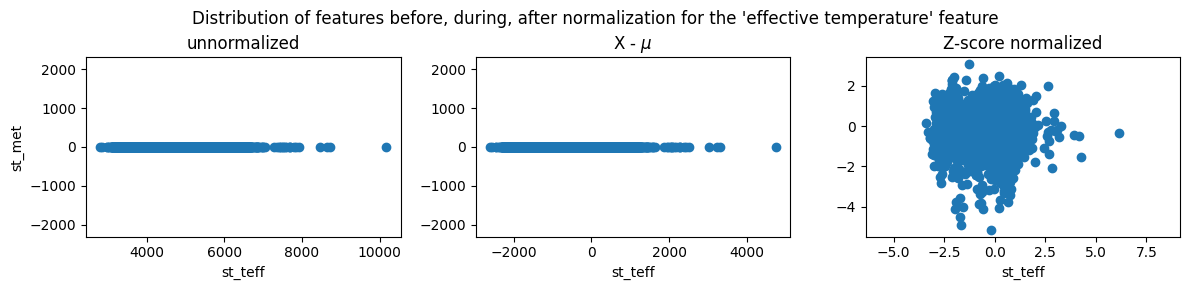

In [234]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Distribution of features before, during, after normalization for the 'effective temperature' feature")
plt.show()

Normalisation allows features centered at 0 with a similar scale.

In [235]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(X_norm, X_mu, X_sigma)

[[-0.69896413  2.72454484  3.42130351 -1.41236685  2.60784862 -3.65587907]
 [-0.86977606  3.92372807  5.37145807 -1.83672365  2.96346117 -3.93841247]
 [-0.68084771  2.21878245  2.43024135 -1.17661307  2.42266171 -3.45406949]
 ...
 [-0.74813726  2.14326137  1.47114894 -1.12946231  2.36898435 -3.63569811]
 [-0.74166711  2.06087473  2.30236236 -0.70510551  2.32470052 -3.33298375]
 [-0.82060292  2.32176574  3.77297072 -1.15303769  2.42131978 -3.23207896]] [5.41414533e+03 1.85471762e+00 1.01983091e+00 3.95427798e-02
 3.46493067e-02 4.26154887e+00] [7.72779754e+02 4.36964083e+00 3.12795719e-01 2.12085678e-01
 7.45193059e-01 4.95516628e-01]


In [236]:
w_norm, b_norm, store_norm = gradient_descent(X_norm, y_train, cost_function, alpha=1e-1, iterations=200)

Iteration   Cost         w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 1.21965e+00 -5.7e-03 -5.6e-03 -9.8e-03 -3.9e-03  1.4e-01  5.7e-02  5.6e-02  9.8e-02  3.9e-02 -1.4e+00
       10 4.79881e-01 -1.6e-02 -1.1e-02 -3.0e-02 -2.7e-02  9.9e-01 -6.8e-04 -4.5e-03  1.7e-03  1.4e-02 -5.0e-01
       20 3.90192e-01 -1.5e-02 -6.9e-03 -3.0e-02 -3.5e-02  1.3e+00 -1.4e-03 -4.0e-03 -6.5e-04  4.8e-03 -1.7e-01
       30 3.79250e-01 -1.4e-02 -3.4e-03 -2.9e-02 -3.7e-02  1.4e+00 -7.0e-04 -3.2e-03 -6.7e-04  1.7e-03 -6.1e-02
       40 3.77892e-01 -1.3e-02 -4.7e-04 -2.8e-02 -3.8e-02  1.4e+00 -1.4e-04 -2.7e-03 -5.7e-04  6.3e-04 -2.1e-02
       50 3.77705e-01 -1.3e-02  1.9e-03 -2.8e-02 -3.9e-02  1.4e+00  2.1e-04 -2.2e-03 -4.6e-04  2.3e-04 -7.4e-03
       60 3.77664e-01 -1.4e-02  3.9e-03 -2.7e-02 -3.9e-02  1.4e+00  4.5e-04 -1.8e-03 -3.6e-04  9.0e-05 

The gradient descent run much faster: 2.5 seconds.
Before normalisation: 12 seconds.
We have optimized the model's performance with z-score normalisation: time reduction excesution of 79.17%, so 79%. 
Indeed, with normalisation we use a small amount of iterations and a bigger learning rate so it is faster.
Let's see the graph.

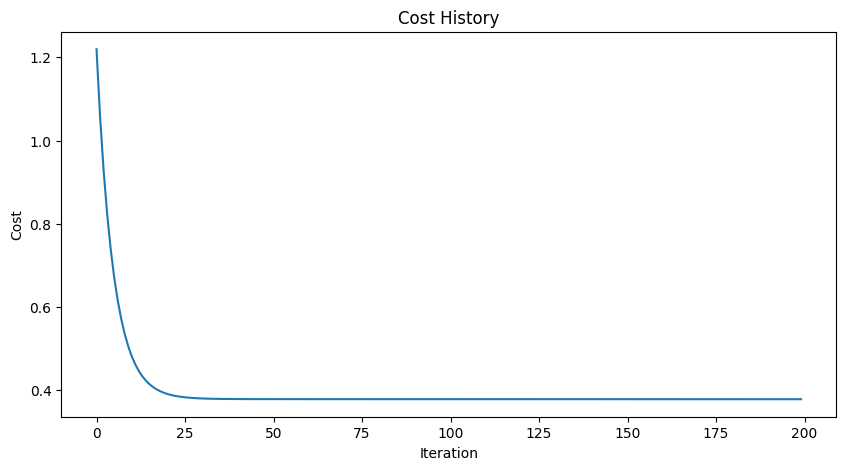

In [237]:
# Extract cost history from the store dictionary
cost_history_norm = store_norm["cost"]

# Set graph size
plt.figure(figsize=(10, 5))

# Create a plot of the cost history
plt.plot(range(len(cost_history_norm)), cost_history_norm)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")

plt.show()

On the graph we can see that the cost is converging towards a value which is good. Let's plot w0 in function of the cost.

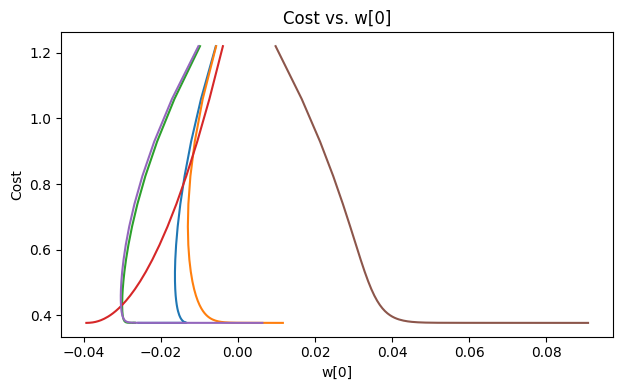

In [238]:
w0_history = [parameters[0] for parameters in store_norm["parameters"]]
# Create a plot of the cost history
plt.figure(figsize=(12, 4))
# Plot cost vs. w[0]
plt.subplot(1, 2, 2)
plt.plot(w0_history, cost_history_norm)
plt.xlabel("w[0]")
plt.ylabel("Cost")
plt.title("Cost vs. w[0]")

plt.tight_layout()
plt.show()

We can see that w0 is decreasing as it should but more rapidly (the slope is 'higher') towards a minimum.

<h3>Compare the predicted target and the actual targets after normalisation</h3>

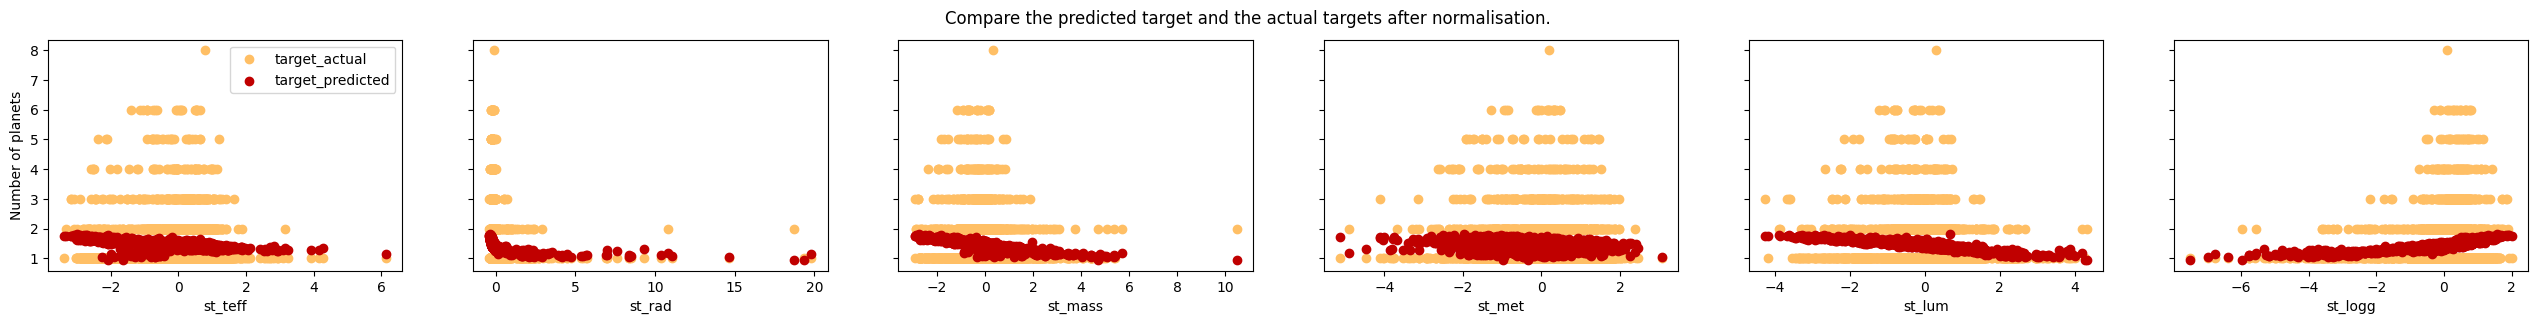

In [239]:
#Colors
yellow = '#FFBF65'
red = '#C00000'

# Predict target using normalized features
m = X_norm.shape[0]
y_predicted_norm = np.zeros(m)
for i in range(m):
    y_predicted_norm[i] = np.dot(X_norm[i], w_norm) + b_norm

    # Plot predictions and targets versus original features    
fig,ax=plt.subplots(1,6,figsize=(32, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i],y_train, color=yellow, label = 'target_actual')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_norm[:,i],y_predicted_norm,color=red, label = 'target_predicted')
ax[0].set_ylabel("Number of planets"); ax[0].legend();
fig.suptitle("Compare the predicted target and the actual targets after normalisation.")

plt.show()

<h3>Conclusion of the optimisation</h3>

Let's know predict a star's number of exoplanets after normalisation using the same star features used in our first conclusion.

In [240]:
x_star_norm = (x_star - X_mu) / X_sigma
x_star_predict_planets_norm = np.dot(x_star_norm, w_norm) + b_norm

print(f" For a star with {x_star[0]} K in effective temperature, {x_star[1]} solar radius, {x_star[2]} solar mass, {x_star[3]} dex in metalicity, {x_star[4]} log10(Solar) of luminosity, {x_star[5]} log10(cm/s**2) of gravitational acceleration, we have a number of exoplanets of {x_star_predict_planets_norm}.")

 For a star with 4874.0 K in effective temperature, 13.76 solar radius, 2.09 solar mass, -0.26 dex in metalicity, 1.978 log10(Solar) of luminosity, 2.45 log10(cm/s**2) of gravitational acceleration, we have a number of exoplanets of 1.1365663371401895.


In [241]:
print(f"The difference between the planets number predicted before normalisation and the planet number predicted after normalisation is: {abs(x_star_predict_planets_norm - x_star_predict_planets)}")

The difference between the planets number predicted before normalisation and the planet number predicted after normalisation is: 0.12576643875552107


This difference is negligible here in the context of our model.
So: We have used the z-score normalisation, and it works. Moreover it has made our algorithm run faster.

<h2 style="text-align:left; color:navy">🪐 - Final Conclusion </h2>

In this project, we developed a linear regression model to predict the number of exoplanets based on various stellar features such as temperature, radius, mass, metallicity, luminosity, and gravitational acceleration. We conducted comprehensive data analysis, data processing, and data visualization to gain insights into the dataset, identify key patterns, and optimize our model.

To improve the model's performance, we employed feature engineering and performed data normalization using Z-score normalization. These steps allowed us to optimize the model and achieve a significant execution time reduction of 79%. While the model demonstrated a basic understanding of the relationship between stellar features and the number of planets, it also revealed some limitations due to the complexity of the dataset, the presence of noise and the removal of certain features, which may have affected its predictive power.

Our analysis showed that the model performs reasonably well in predicting smaller numbers of exoplanets, as demonstrated in specific predictions from the dataset. However, the model struggled with more complex relationships, likely due to missing data and the simplification of features in the dataset.

<h4>Future Improvements:</h4>

To further enhance the accuracy and robustness of the model, several improvements can be made:

Handling Missing Data: Instead of removing rows with missing values, advanced imputation techniques like KNN imputation or regression-based imputation could be used to preserve more information from the dataset.

Feature Expansion: Introducing additional features such as stellar variability, orbital characteristics, or even incorporating more detailed spectral data could offer better predictive insights.

Non-Linear Models: Exploring non-linear models like decision trees, random forests, or neural networks could capture more complex relationships that linear regression may overlook.

Larger Dataset: Expanding the dataset with more stars and exoplanet data, along with more diverse stellar systems, would provide more comprehensive training data for better predictions.

<h4>Overall:</h4>This project showcases the potential of machine learning, particularly linear regression, for exoplanet research. With more advanced techniques and a richer dataset, the model's accuracy could be further improved. Despite its limitations, this project serves as a demonstration of applying data science methods to real-world astronomical data, providing valuable insights into star-planet relationships. The incorporation of data preprocessing techniques, such as feature engineering and normalization, underscores the importance of optimizing model performance.

<h1 style="text-align:center; color:darkred">🪐 Soraya PANAMBALOM 🪐</h1>